# import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('sign11.jpg',0)
img1 = cv2.imread('sign11.jpg')#,cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
imgcolor = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)
imgthresh = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)

imgcontour = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(im,cmap = 'gray')

<IPython.core.display.Javascript object>


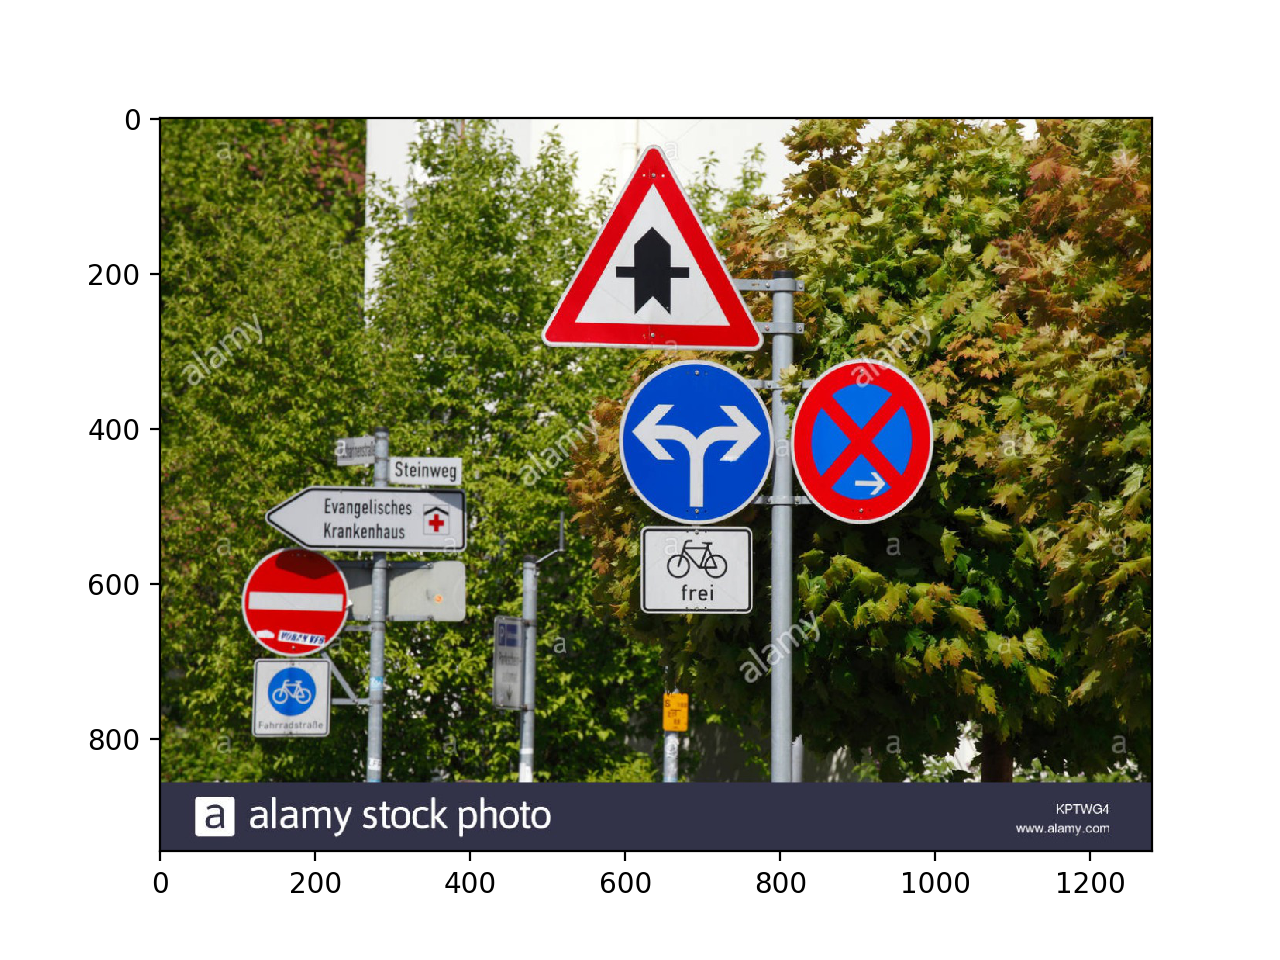

In [167]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('sign100.jpeg',0)

img1 = cv2.imread('sign100.jpeg')#,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('sign100.jpeg',cv2.COLOR_BGR2RGB)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

imgcolor = img1.copy()

imgthresh = img1.copy()

imgcontour = img1.copy()
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(imgcolor)

<IPython.core.display.Javascript object>


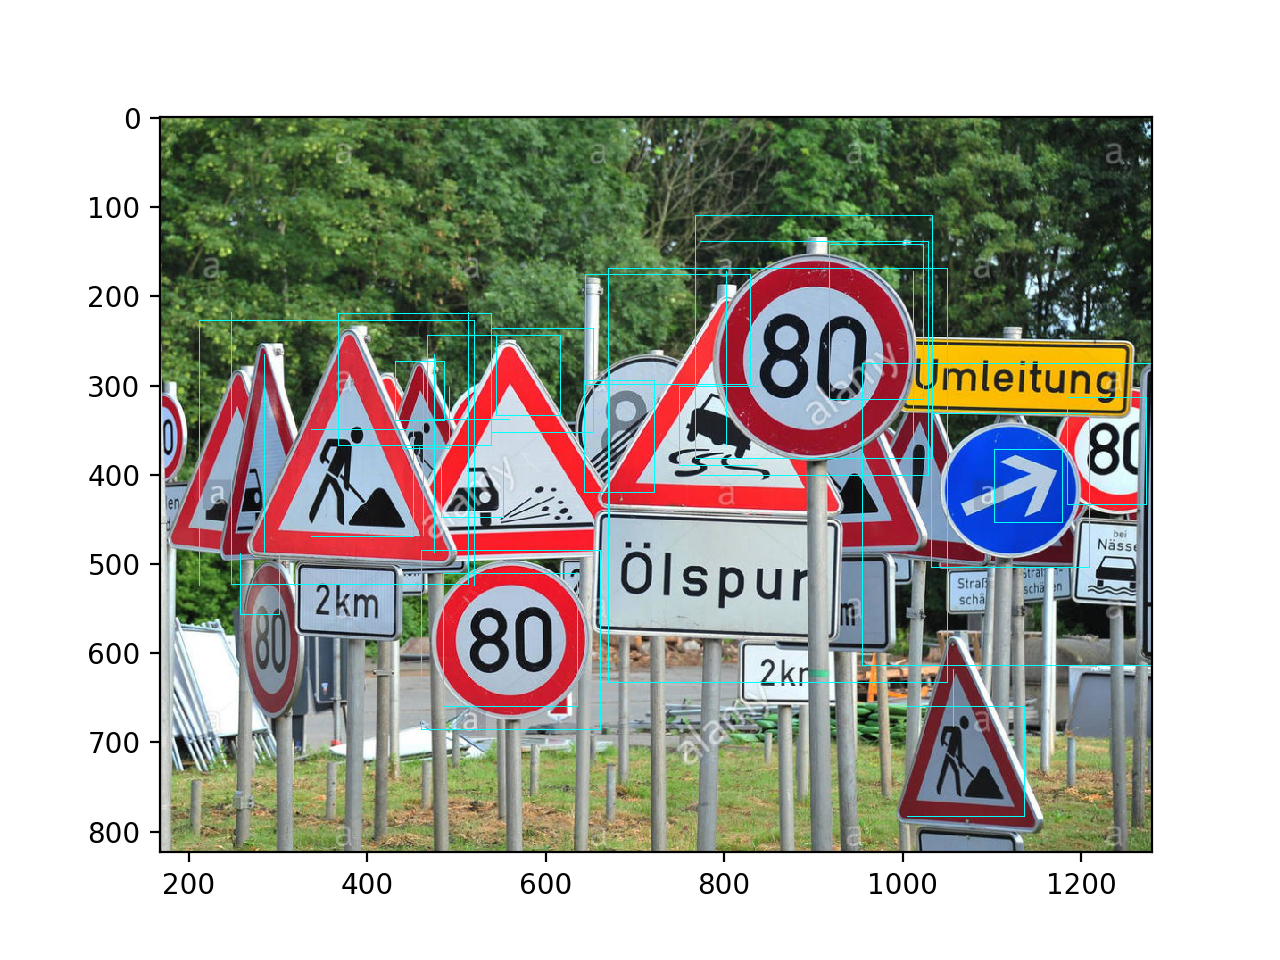

In [253]:
plt.imshow(edges)

In [168]:
im2, contours, hierarchy = cv2.findContours(np.uint8(edges),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

7726

In [169]:
cntr=[]
root = {}
root1 = {}
for i in range(len(contours)):
    
    if(hierarchy[0][i][3] == -1):
        root[i]=1
        cntr.append(contours[i])
            
     
            

for i in range(len(contours)):
    
    if hierarchy[0][i][3] in root.keys():
        cntr.append(contours[i])
        root1[i]=1
        
for i in range(len(contours)):
    
    if hierarchy[0][i][3] in root1.keys():
        cntr.append(contours[i])
  
    

In [170]:
hierarchy.shape

(1, 7726, 4)

In [171]:
contours = cntr

In [172]:
len(cntr)

7621

In [173]:
conts = []
perLen = 0.035
perLen2 = 0.35
percolor = 0.15
pd=0.1

for i in range(len(contours)):
    
#     print(i)
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    #if(w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and h!=0 and w/h>=0.5 and w/h<=2):
    pcolor = checkcolor(imgcolor[max(0,int(y - h*pd)) : min(int(y+h+h*pd),img.shape[0]-1) , max(0,int(x-w*pd)) : min((int(x+w+w*pd),img.shape[1]-1))])
#     print('hello')

    

    if(pcolor>percolor and h!=0 and w/h>=0.555 and w/h<=1.8 and w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and (w<=img.shape[0]*perLen2 and h<=img.shape[1]*perLen2)):
        conts.append([x,y,w,h,cA,i])
        print("Color per is - ",pcolor)
        cv2.rectangle(imgcontour,((max(0,int(x-w*pd))),max(0,int(y - h*pd))),(min(int(x+w+w*pd),img.shape[1]-1),min(int(y+h+h*pd),img.shape[0]-1)),(0,255,255),1)
    
        
    
    
conts = sorted(conts, reverse = True, key = lambda value : (value[4]))
# conts[:10]
    
conts = np.array(conts)

Color per is -  0.1749848759830611
Color per is -  0.15091528309919114
Color per is -  0.4242292661745549
Color per is -  0.3814814814814815
Color per is -  0.3490545203588682
Color per is -  0.40399144689950106
Color per is -  0.5245768449559919
Color per is -  0.4270776004402862
Color per is -  0.15497076023391812
Color per is -  0.3767225477430556
Color per is -  0.19022633744855966
Color per is -  0.24380804953560373
Color per is -  0.19717632745967584
Color per is -  0.2680443548387097
Color per is -  0.1786504424778761
Color per is -  0.40399144689950106
Color per is -  0.5245768449559919
Color per is -  0.19717632745967584
Color per is -  0.39993074792243766
Color per is -  0.6171493902439025
Color per is -  0.3159848484848485


In [134]:
len(conts)

73

In [16]:
threshcopy = 

NameError: name 'thresh' is not defined

<IPython.core.display.Javascript object>


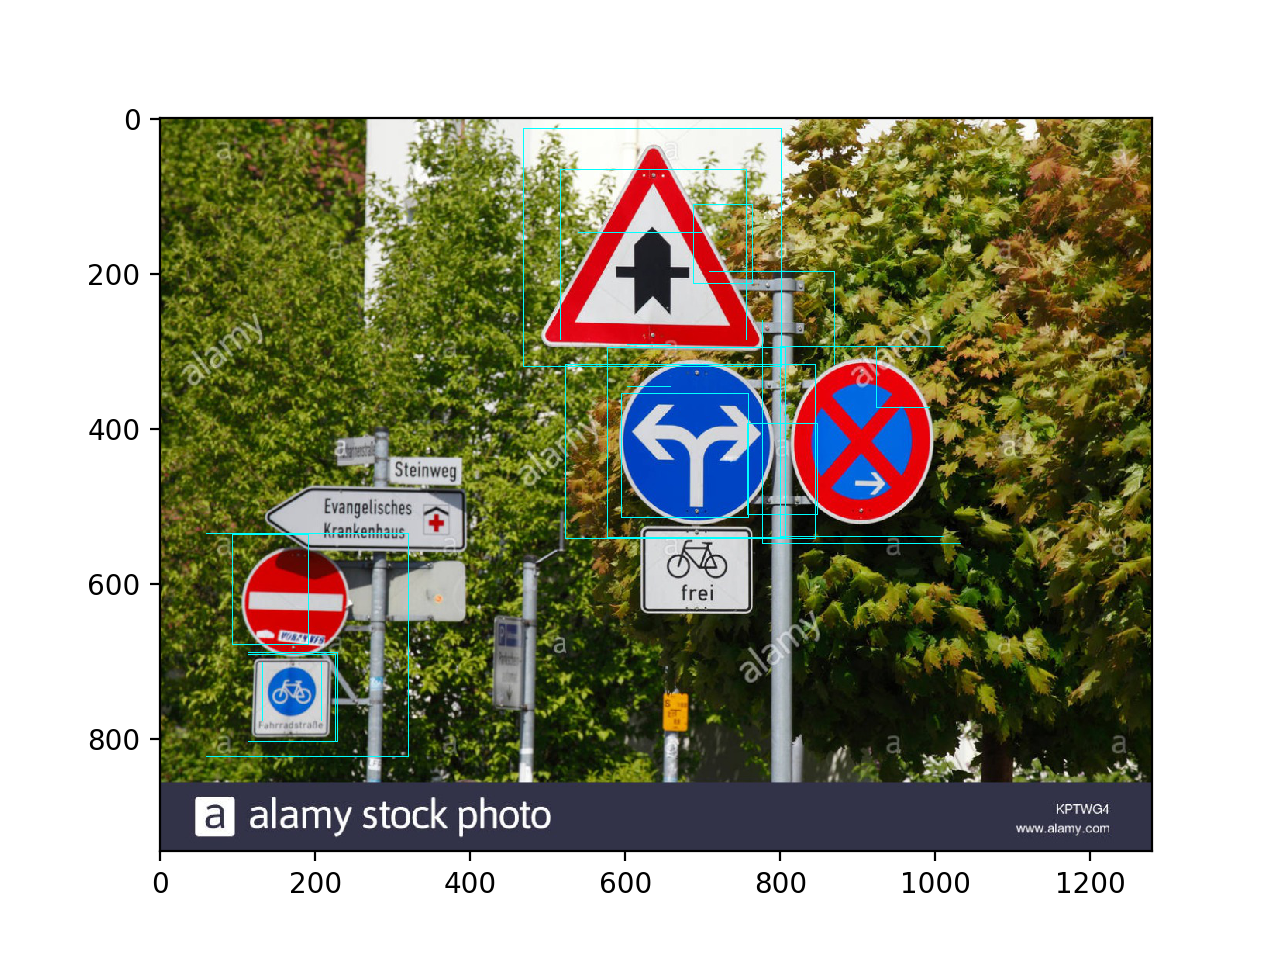

In [174]:
plt.imshow(imgcontour)

In [7]:
img.shape

(396, 650)

In [8]:
max(0,int(y - h*pd)) , min(int(y+h+h*pd),img.shape[1]-1) , max(0,int(x-w*pd)) , min((int(x+w+w*pd),img.shape[0]-1))

(267, 272, 398, 395)

In [9]:
x,y,x+w,y+h

(399, 268, 412, 272)

ValueError: zero-size array to reduction operation minimum which has no identity

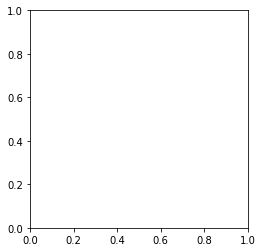

In [8]:
plt.imshow(imgcolor[max(0,int(y - h*pd)) : min(int(y+h+h*pd),img.shape[1]-1) , max(0,int(x-w*pd)) : min((int(x+w+w*pd),img.shape[0]-1))])

In [175]:
shape = "unidentified"
newCont = []
for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.02 * peri, True)
    
    if(len(approx)==4 or len(approx)==6 or len(approx)==3 or len(approx)==8):
    
        newCont.append(conts[i])
    
    

In [30]:
str(type(newCont[0]))=="<class 'numpy.ndarray'>"

True

In [176]:
str(type(newCont[0]))

newCont

[array([  497,    40,   277,   256, 70912,  4989]),
 array([  497,    40,   277,   256, 70912,  7276]),
 array([  597,   318,   191,   203, 38773,  2907]),
 array([  597,   318,   191,   203, 38773,  6433]),
 array([  536,    86,   200,   183, 36600,  7614]),
 array([  818,   316,   176,   204, 35904,  2925]),
 array([  818,   316,   176,   204, 35904,  6436]),
 array([ 102,  550,   81,  118, 9558, 1559]),
 array([ 123,  702,   94,   93, 8742, 5613]),
 array([ 139,  709,   63,   63, 3969, 7431]),
 array([ 930,  302,   58,   66, 3828, 3035])]

In [177]:
xyz = np.array(newCont.copy())

m = xyz.mean(axis=0)[4]
std = xyz.std(axis=0)[4]

print(m,std)

32170.454545454544 22953.181298078907


In [149]:
conts=[]
for i in range(len(newCont)):
    for j in range(len(newCont)):
        
        if(str(type(newCont[i]))=="<class 'numpy.ndarray'>" and str(type(newCont[j]))=="<class 'numpy.ndarray'>" and i!=j and newCont[i][2]*newCont[i][3]>=0.40*newCont[j][2]*newCont[j][3] and newCont[i][1]>=newCont[j][1] and newCont[i][0]>=newCont[j][0] and newCont[i][0] + newCont[i][2] <=  newCont[j][0] + newCont[j][2] and newCont[i][1] + newCont[i][3] <=  newCont[j][1] + newCont[j][3]):
    
            newCont[i] = -1
            
        
for i in range(len(newCont)):
    
    if(str(type(newCont[i]))=="<class 'numpy.ndarray'>"):
        conts.append(newCont[i])
        



In [150]:
conts = np.array(conts)
len(conts)


6

In [72]:
conts[2][4]

750

In [45]:
ind = 10
plt.imshow(imgcolor[  conts[ind,1] : conts[ind,1] + conts[ind,3] , conts[ind,0] : conts[ind,0] + conts[ind,2]  ])

In [53]:
# load json and create model
from keras.models import model_from_json
json_file = open('trafficsign1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("trafficsign1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model

Loaded model from disk


In [54]:
def pre(X):
  #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :,  0] + 0.587 * X[:, :,  1] + 0.114 * X[:, :,  2]
  
#   print(X)
#   X = cv2.cvtColor(X,cv2.COLOR_BGR2YCR_CB)
  
#   X = X[:][:][:][0]
  #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

#   for i in range(X.shape[0]):
#       with warnings.catch_warnings():
#           warnings.simplefilter("ignore")
#           X[i] = exposure.equalize_adapthist(X[i])
#       print_progress(i + 1, X.shape[0])

 

  # Add a single grayscale channel
#   X = X.reshape(X.shape + (1,)) 
  
    return X

In [ ]:
def inside(insideCo)

<IPython.core.display.Javascript object>


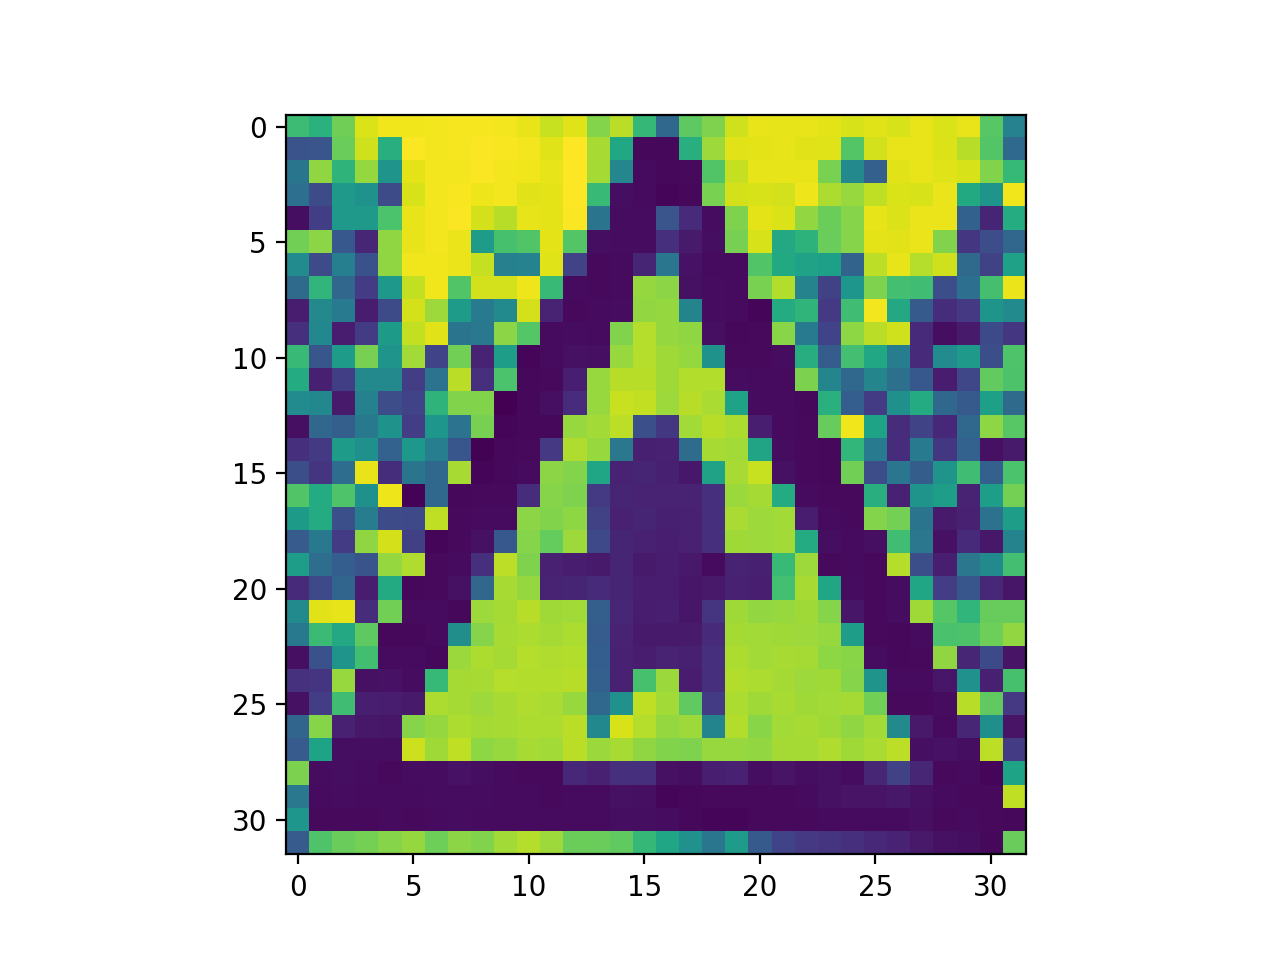

11 - 0
13 - 1


<IPython.core.display.Javascript object>


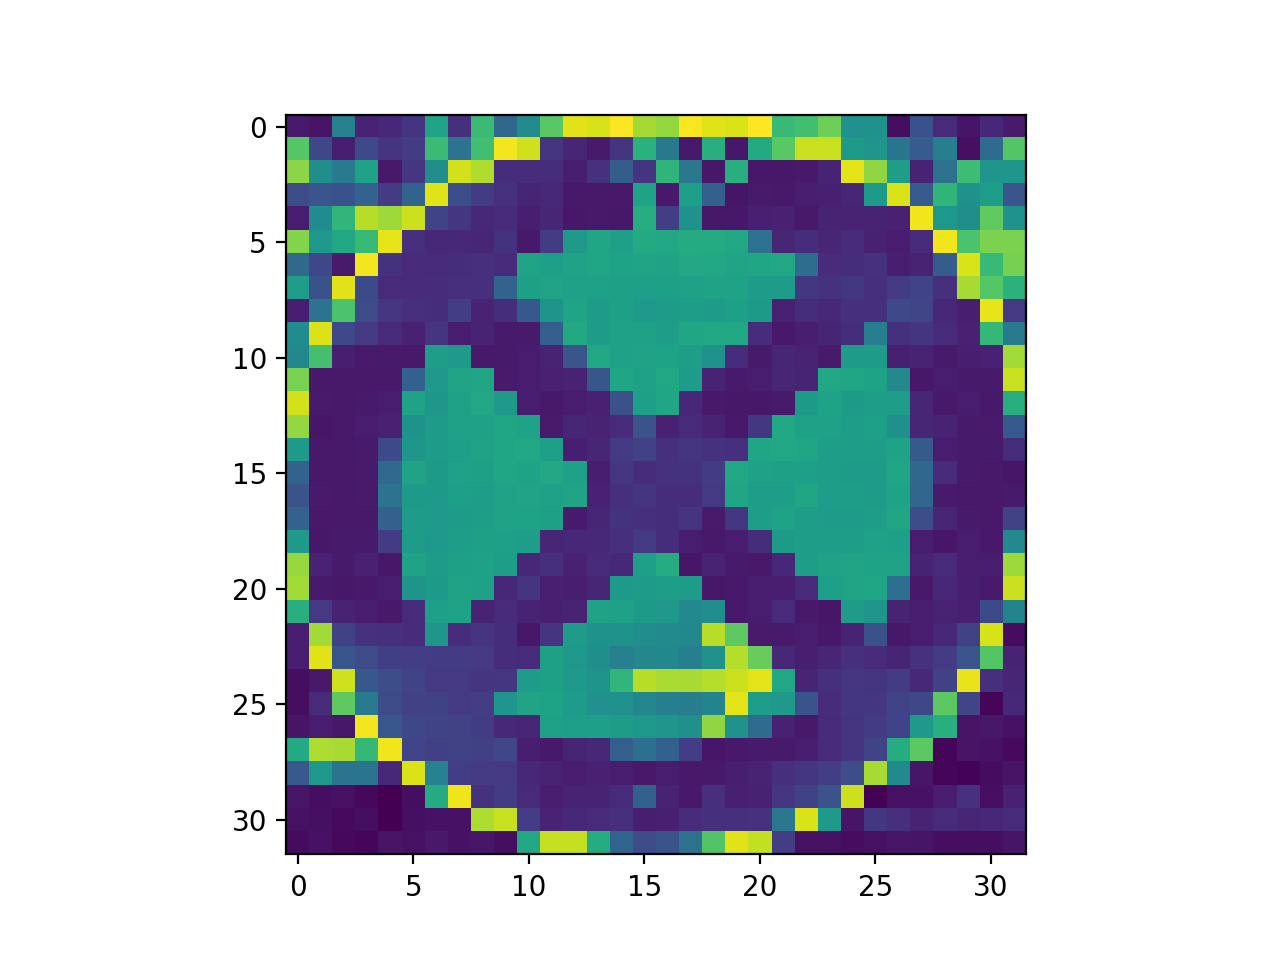

1 - 2


<IPython.core.display.Javascript object>


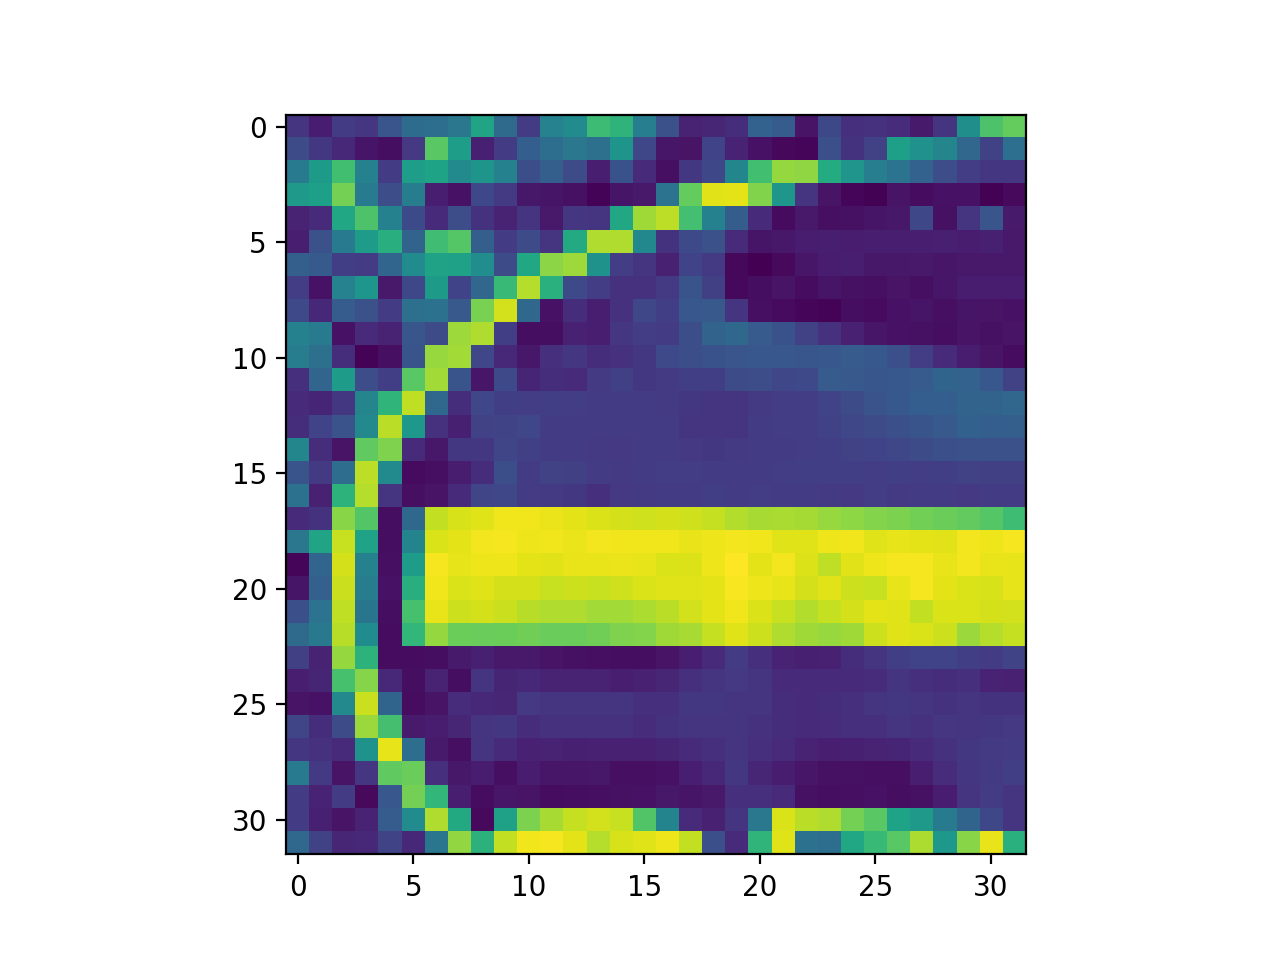

9 - 3


<IPython.core.display.Javascript object>


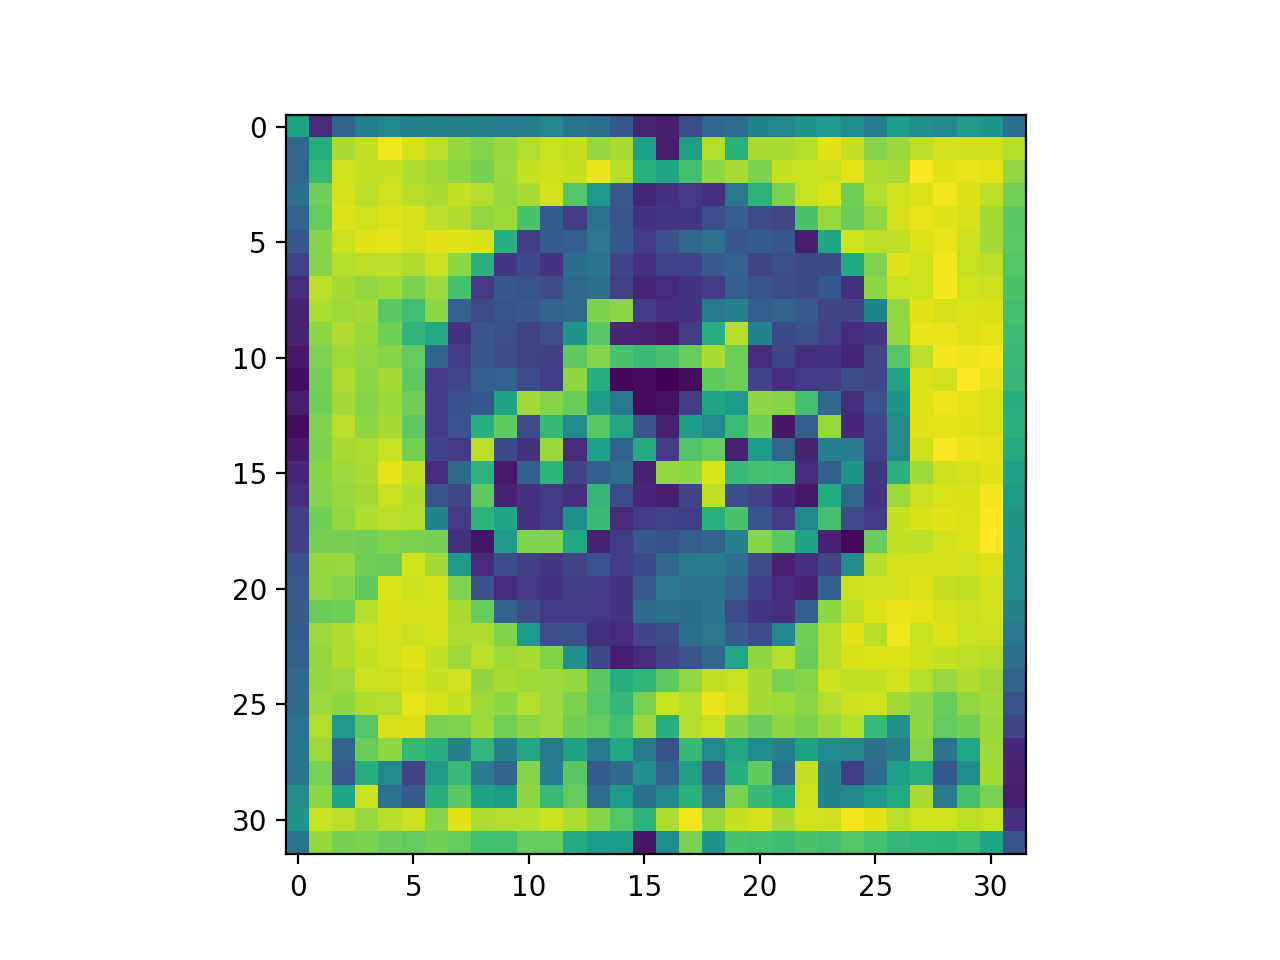

14 - 4


<IPython.core.display.Javascript object>


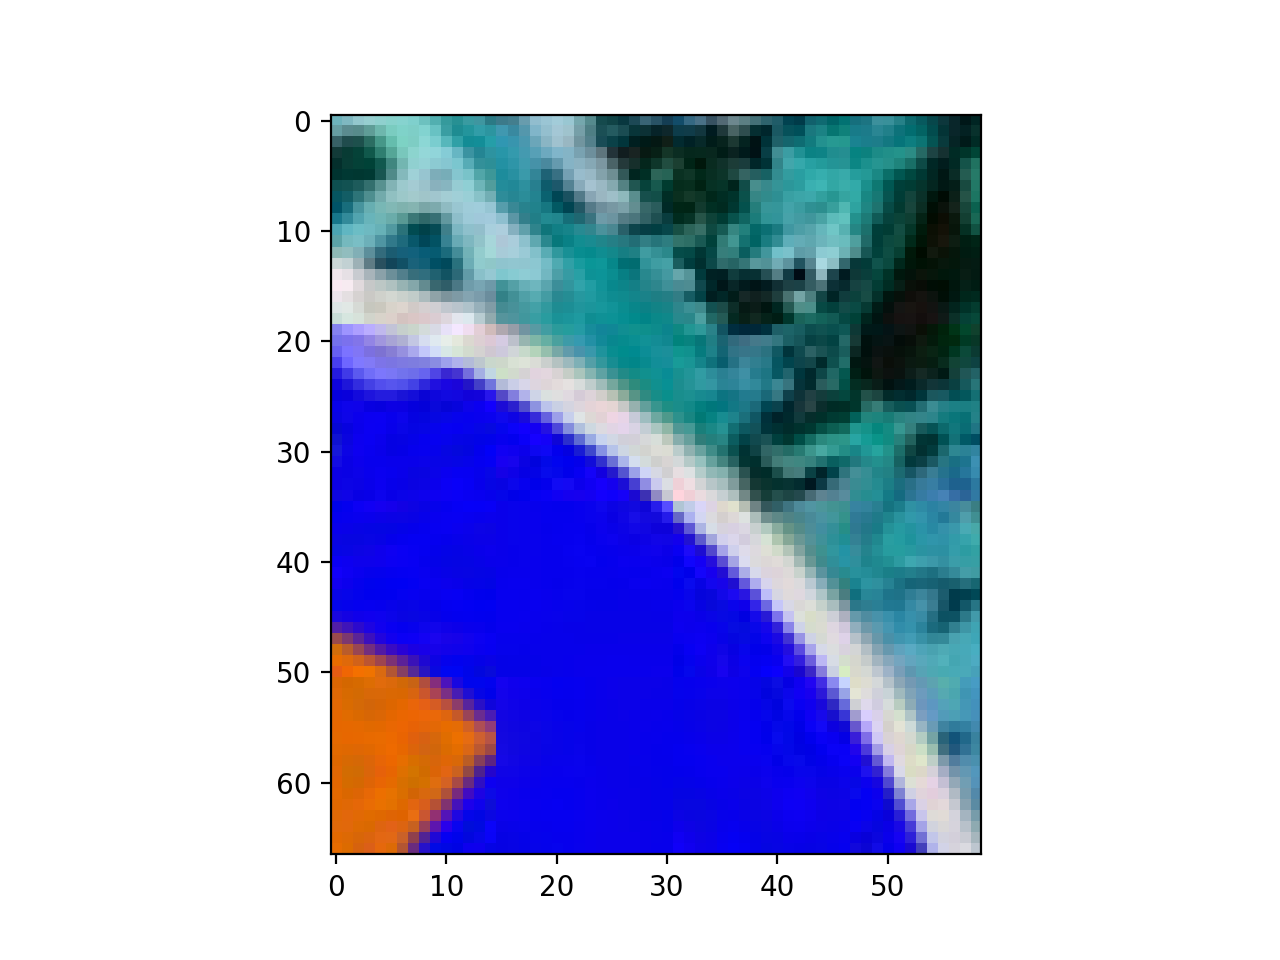

38 - 5


In [151]:
ans = []
par=0.01
for i in range(len(conts)):
    

    check = img2.copy()
    check = check[int(conts[i,1] - conts[i,3]*par)  : int(conts[i,1] + conts[i,3] + conts[i,3]*par) , int(conts[i,0] - conts[i,2]*par) : int(conts[i,0] + conts[i,2] + conts[i,2]*par)]




    labs = cv2.cvtColor(check, cv2.COLOR_RGB2LAB)

    lab_planes = cv2.split(labs)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))

    lab_planes[0] = clahe.apply(lab_planes[0])

    labs = cv2.merge(lab_planes)

    check = cv2.cvtColor(labs, cv2.COLOR_LAB2RGB)





#         img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#         print(img.shape)

    check = pre(check)


    check = cv2.resize(check, (32, 32))

    plt.figure(i)
    plt.imshow(check)


    check = np.array(check).reshape(-1, 32, 32, 1)


    print(np.argmax(model.predict(check)),"-",i)
    ans.append(model.predict(check))
    
    

In [153]:
i=5
check = img2.copy()
plt.imshow(check[int(conts[i,1] - conts[i,3]*par)  : int(conts[i,1] + conts[i,3] + conts[i,3]*par) , int(conts[i,0] - conts[i,2]*par) : int(conts[i,0] + conts[i,2] + conts[i,2]*par)])

conts[i]



array([ 930,  302,   58,   66, 3828, 3035])

In [68]:
r = np.unique(ans, return_counts= True)

In [101]:
r[0][np.argmax(r[1])]

1.6840274e-06

In [102]:
ans2=[]
for i in range(len(ans)):
    ans3 = list(ans[i])
    
    ans2.append((np.argmax(ans3[0]),ans3[0][np.argmax(ans[i])]))

In [103]:
ans2,

([(14, 0.63716185),
  (14, 0.63716185),
  (31, 0.7190422),
  (41, 0.53912944),
  (15, 0.8869311),
  (15, 0.8869311)],)

In [10]:
# def isRed(pix):
    
#     h,s,v = pix
    
#     if((s>145 ) and ((h>=0 and h<10) or (h>150 and h<190))):
        
#         return True
    
#     return False



# def isYellow(pix):
    
#     h,s,v = pix
    
#     if((s>145 ) and  (h>17 and h<31)):
        
#         return True
    
#     return False
    
    
# def isBlue(pix):
    
#     h,s,v = pix
    
#     if((s>160 ) and  (h>102 and h<115)):
        
#         return True
    
#     return False


def isRed(pix):    
    h,s,v = pix    
    if((s>65) and ((h<10) or (h>150 and h<190)) and v>110):        
        return True    
    return False


def isYellow(pix):    
    h,s,v = pix    
    if((s>210) and (h>17 and h<31) and v>140):   
        return True    
    return False
    
    
def isBlue(pix):    
    h,s,v = pix    
    if((s>130) and (h>102 and h<115) and v>110):        
        return True    
    return False

In [11]:
def checkcolor(imgcolor):
    
    
    
    
    #imgcolor = cv2.GaussianBlur(imgcolor, (3,3), 0)
    
    
    lab = cv2.cvtColor(imgcolor, cv2.COLOR_RGB2LAB)
    
    lab_planes = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))
    
    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    imgcolor = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
   
    imgHSV = cv2.cvtColor(imgcolor, cv2.COLOR_RGB2HSV)
    
    
    threshR = np.zeros(imgcolor.shape[:2])
    threshB = np.zeros(imgcolor.shape[:2])
    threshY = np.zeros(imgcolor.shape[:2])
    thresh = np.zeros(imgcolor.shape[:2])
    
    for i in range(imgcolor.shape[0]):
        for j in range(imgcolor.shape[1]):
            thresh[i,j] = thresh[i,j] or isRed(imgHSV[i,j])
            thresh[i,j] = thresh[i,j] or isBlue(imgHSV[i,j])
            thresh[i,j] = thresh[i,j] or isYellow(imgHSV[i,j]) 
            
    per = np.sum(thresh)/(thresh.shape[1]*thresh.shape[0])
    
#     plt.imshow(thresh)
    
    return per

In [19]:
ansss = checkcolor(imgthresh)